# Homework #3



## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

faces = datasets.fetch_olivetti_faces()
data = faces['images']
target = faces.target

In [2]:
np.unique(target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

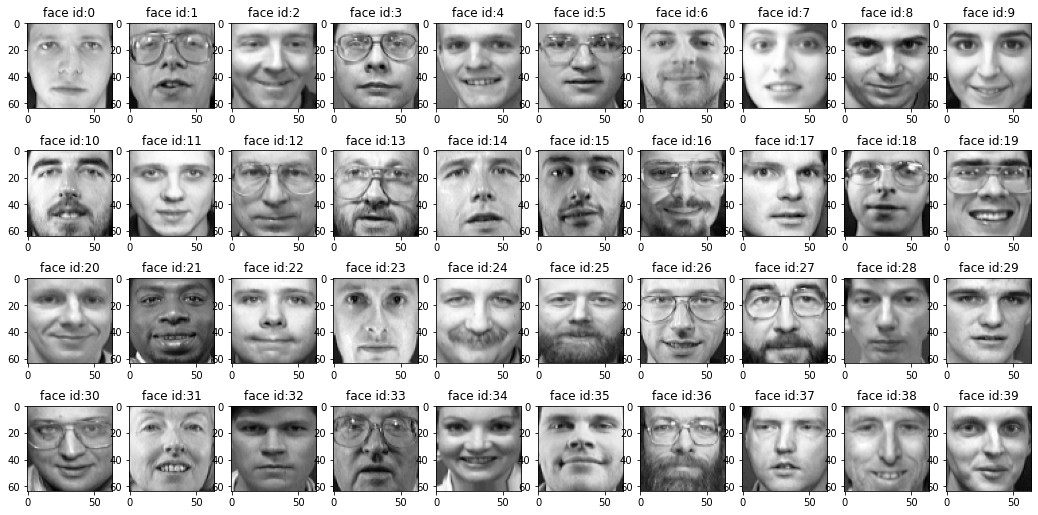

In [3]:
fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr=axarr.flatten()
for unique_id in np.unique(target):
    image_index = unique_id*10
    axarr[unique_id].imshow(data[image_index], cmap='gray')
    axarr[unique_id].set_title("face id:{}".format(unique_id))

In [18]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split

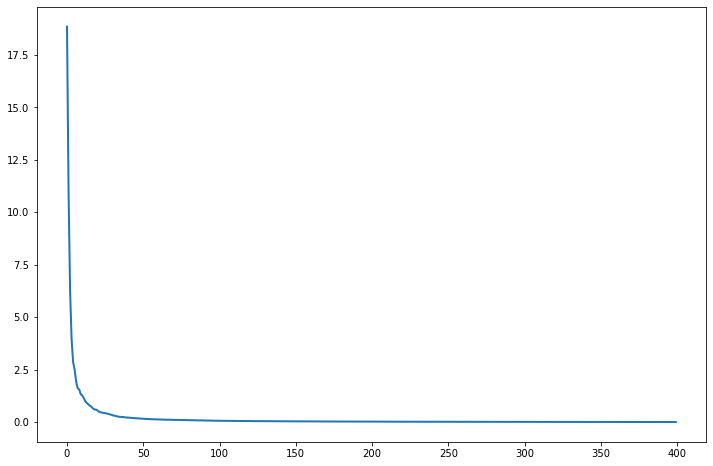

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(1 , figsize=(12,8))
plt.plot(pca.explained_variance_ , linewidth = 2)
plt.show()

train_test_split fonksiyonundaki stratify ile herbirinden 1 tane seçebiliyoruz.

In [37]:
from sklearn.svm import SVC
from sklearn import metrics

def makeSVCModel():
    X_train , X_test , y_train , y_test = train_test_split(X , target , test_size = 0.1 , stratify = target)
    n_components = 90
    pca = PCA(n_components = n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = SVC()
    model.fit(X_train_pca , y_train)
    y_pred = model.predict(X_test_pca)
    return metrics.accuracy_score(y_test , y_pred)

In [38]:
from scipy.stats import t

N=10

experiments = [makeSVCModel() for i in range(N)]

m=np.mean(experiments)
dev = np.std(experiments)

t.interval(0.95 , N-1 , loc = m , scale = dev)

(0.922486367371866, 0.997513632628134)

In [49]:
from sklearn.linear_model import LogisticRegression

def makeRegrModel():
    X_train , X_test , y_train , y_test = train_test_split(X , target , test_size = 0.1 , stratify = target)
    regr = LogisticRegression(multi_class='multinomial' , max_iter=2500)
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    return metrics.accuracy_score(y_test , y_pred)

N=10

experiments = [makeRegrModel() for i in range(N)]

m=np.mean(experiments)
dev = np.std(experiments)

t.interval(0.95 , N-1 , loc = m , scale = dev)

(0.946067642558885, 1.0139323574411148)

## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 2 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 2.


In [1]:
import os
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import pandas as pd

In [2]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
path = "C:/Users/Hakan/Desktop/New folder (2)/aclImdb/test/pos"
  
os.chdir(path)
  
positivetestliste = [] 
  
def read_text_file(file_path):
    with open(file_path, 'r' , encoding="utf8") as f:
        data = f.read()
        return data

for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        positivetestliste.append(read_text_file(file_path))

In [4]:
path = "C:/Users/Hakan/Desktop/New folder (2)/aclImdb/test/neg"
  
os.chdir(path)
  
negativetestliste = []   
    
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        negativetestliste.append(read_text_file(file_path))

In [5]:
path = "C:/Users/Hakan/Desktop/New folder (2)/aclImdb/train/pos"
  
os.chdir(path)
  
positivetrainliste = []   
    
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        positivetrainliste.append(read_text_file(file_path))

In [6]:
path = "C:/Users/Hakan/Desktop/New folder (2)/aclImdb/train/neg"
  
os.chdir(path)
  
negativetrainliste = []   
    
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        negativetrainliste.append(read_text_file(file_path))

In [7]:
path = "C:/Users/Hakan/Desktop/New folder (2)/aclImdb/train/unsup"
  
os.chdir(path)
  
unsuptrainliste = []   
    
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        unsuptrainliste.append(read_text_file(file_path))

In [8]:
def cleaning(text):
    soup = BeautifulSoup(text,"html.parser")
    text = soup.get_text()
    text = re.sub('\[[^]]*\]', '', text)
    return text

In [9]:
positivetestdict = dict.fromkeys(positivetestliste, 'positive')
negativetestdict = dict.fromkeys(negativetestliste, 'negative')
positivetraindict = dict.fromkeys(negativetestliste, 'positive')
negativetraindict = dict.fromkeys(negativetestliste, 'negative')
unsuptraindict = dict.fromkeys(negativetestliste, 'unsup')
df1 = pd.DataFrame(list(positivetestdict.items()),columns = ['review','sentiment']) 
df2 = pd.DataFrame(list(negativetestdict.items()),columns = ['review','sentiment']) 
df3 = pd.DataFrame(list(positivetraindict.items()),columns = ['review','sentiment'])
df4 = pd.DataFrame(list(negativetraindict.items()),columns = ['review','sentiment'])
df5 = pd.DataFrame(list(unsuptraindict.items()),columns = ['review','sentiment'])

In [10]:
frames = [df1, df2]
test = pd.concat(frames)
frames2 = [df3, df4 ,df5]
train = pd.concat(frames2)
train

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,positive
1,This is an example of why the majority of acti...,positive
2,"First of all I hate those moronic rappers, who...",positive
3,Not even the Beatles could write songs everyon...,positive
4,Brass pictures (movies is not a fitting word f...,positive
...,...,...
12356,I occasionally let my kids watch this garbage ...,unsup
12357,When all we have anymore is pretty much realit...,unsup
12358,The basic genre is a thriller intercut with an...,unsup
12359,Four things intrigued me as to this film - fir...,unsup


In [11]:
train['review'] = train['review'].apply(cleaning)
test['review'] = test['review'].apply(cleaning)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 0 , max_df=3 , binary = False , ngram_range=(1,3))
cv_reviews_train = cv.fit_transform(train['review'])
cv_reviews_test = cv.fit_transform(test['review'])
cv_reviews_test.shape

(24801, 4733965)

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
sentiment_train = lb.fit_transform(train['sentiment'])
sentiment_test = lb.fit_transform(test['sentiment'])
sentiment_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(cv_reviews_train.toarray(),sentiment_train)

MemoryError: Unable to allocate 636. GiB for an array with shape (37083, 2301074) and data type int64

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC(kernel='linear')
clf.fit(cv_reviews_test, sentiment_test)

C:\Users\Hakan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
